In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

# **New Data**

In [2]:
filename = os.path.join(os.getcwd(), "data/processed", "a_courseSections_2024-08-29.csv")
courseSections_df = pd.read_csv(filename, header = 0)

filename_second = os.path.join(os.getcwd(), "data/processed", "a_scores_2024-09-11.csv")
scores_df = pd.read_csv(filename_second, header = 0)

filename_third = os.path.join(os.getcwd(), "data/processed", "a_vendorUsage_2024-09-11.csv")
vendorUsage_df = pd.read_csv(filename_third, header = 0)

filename_fourth = os.path.join(os.getcwd(), "data/processed", "a_benchmarks_2024-09-11.csv")
benchmarks_df = pd.read_csv(filename_fourth, header = 0)

filename_fifth = os.path.join(os.getcwd(), "data/processed", "a_courseSectionRosters_2024-08-29.csv")
courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)

filename_sixth = os.path.join(os.getcwd(), "data/processed", "a_schools_2024-08-29.csv")
schools_df = pd.read_csv(filename_sixth, header = 0)

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_27819/713448464.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionsRosters_df = pd.read_csv(filename_fifth, header = 0)


In [3]:
courseSections_df.head(10)

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222
5,40393,MATH 4,2015,222
6,40394,SOC ST 4,2015,222
7,40395,HmroomPK6,2015,222
8,40396,READING 4,2015,222
9,40397,MATH 4,2015,222


In [4]:
courseSections_df.shape

(17662, 4)

In [5]:
courseSections_df.vanityId.nunique()

1047

In [6]:
courseSections_df.id.nunique()

17662

In [7]:
print(courseSections_df.isnull().sum())

id          0
vanityId    0
year        0
schoolId    0
dtype: int64


In [35]:
courseSections_df.isna().sum() > 0

id          False
vanityId    False
year        False
schoolId    False
dtype: bool

In [8]:
courseSectionsRosters_df.head(10)

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN
5,1047738,39975,45429,4,NaN
6,1047740,39975,56118,4,NaN
7,1047746,39975,45438,4,NaN
8,1047751,39975,45444,4,NaN
9,1047752,39975,45445,4,NaN


In [9]:
courseSectionsRosters_df.courseSectionId.nunique()

17659

In [10]:
print(type(list(courseSectionsRosters_df.courseSectionId)))

<class 'list'>


In [11]:
print(courseSectionsRosters_df['courseSectionId'].isin(courseSections_df['id']).all())

True


Merge courseSections and courseSectionsRosters by id - all courseSectionRosters courseSectionId values are in courseSections. 

In [12]:
count = 0
id_array = []
courseSectionsIds = list(courseSections_df.id)
courseSectionRostersIds = list(courseSectionsRosters_df.courseSectionId)
for id in courseSectionsIds:
    if id in courseSectionRostersIds:
        id_array.append(id)
        print(id)
    if count == 10:
        break
    count += 1

print(len(id_array))

40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
11


In [13]:
scores_df.head(10)

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44775,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44776,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,44776,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,44776,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,44777,6,2017,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [15]:
scores_df.shape

(303750, 69)

In [16]:
scores_df.studentId.nunique()

125223

Is there a way to find which student ID belongs at which school?

In [17]:
benchmarks_df.head(10)

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [18]:
testTypes = benchmarks_df.dataSource.unique()
testTypes

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

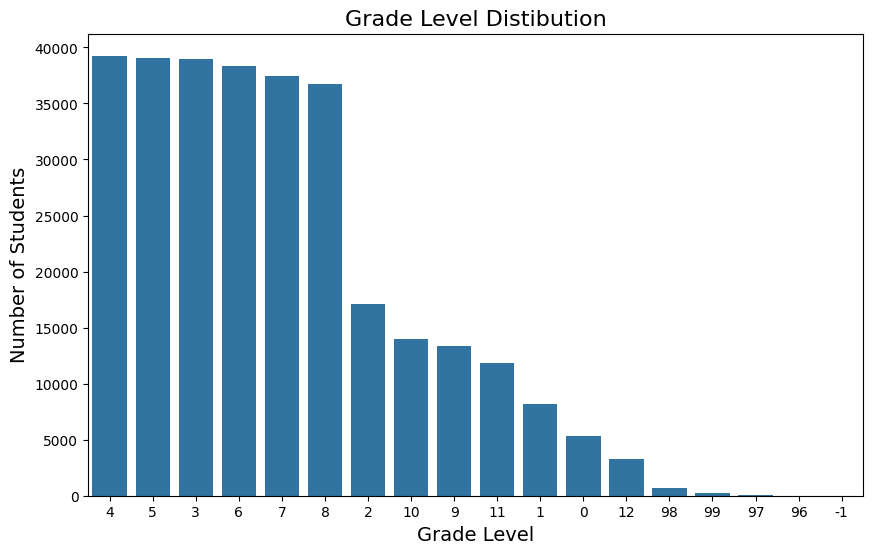

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='studentLevel', order=scores_df['studentLevel'].value_counts().index)

plt.title('Grade Level Distibution', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

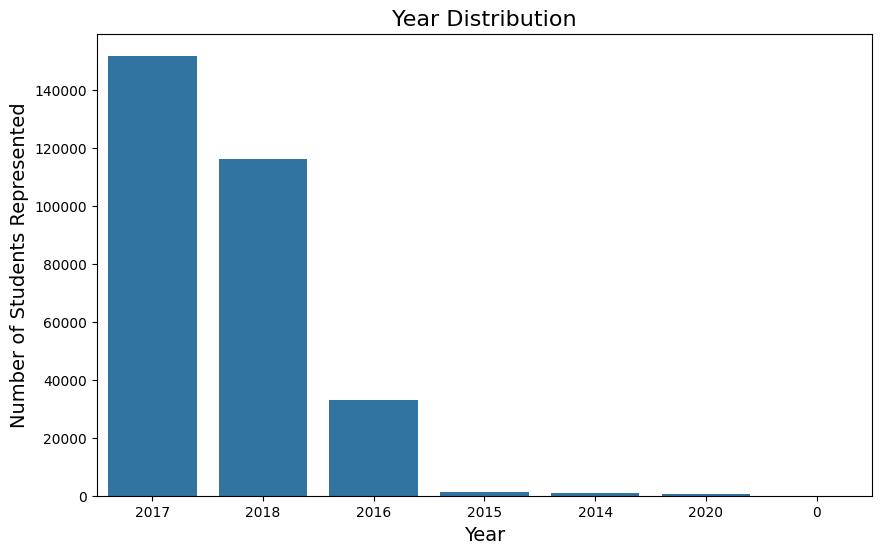

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=scores_df, x='year', order=scores_df['year'].value_counts().index)

plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Students Represented', fontsize=14)

plt.show()

In [42]:
student_counts = scores_df['studentId'].value_counts()

duplicate_students = student_counts[student_counts > 1]

total_dupes = duplicate_students.count()

print("Total Duplicates: ", total_dupes)

Total Duplicates:  82751


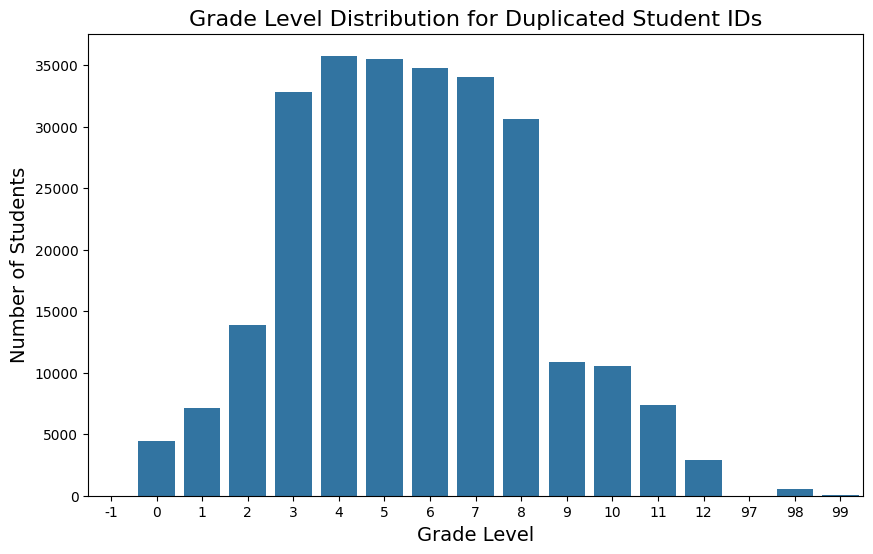

In [50]:

duplicate_student_ids = duplicate_students.index
duplicated_entries = scores_df[scores_df['studentId'].isin(duplicate_student_ids)]


plt.figure(figsize=(10, 6))
sns.countplot(data=duplicated_entries, x='studentLevel', order=sorted(duplicated_entries['studentLevel'].unique()))

plt.title('Grade Level Distribution for Duplicated Student IDs', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()

In [20]:
vendorUsage_df.head(10)

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0
5,11895,72609,44810,0,2018,1,0
6,11896,72609,44811,0,2018,1,0
7,11897,72609,44812,0,2018,1,0
8,11898,72609,44813,0,2018,1,0
9,11899,72609,44814,0,2018,1,0


In [21]:
vendorUsage_df.shape

(158007, 7)

In [22]:
vendorUsage_df.vendorId.nunique()

23

In [23]:
schools_df.head(10)

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


In [24]:
benchmarks_df.head(10)

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


Checking connections between dataframes

In [32]:
print(courseSectionsRosters_df['studentId'].isin(scores_df['studentId']).sum())

484714


In [33]:
print(scores_df['studentId'].isin(courseSectionsRosters_df['studentId']).sum())

34316


In [28]:
print(vendorUsage_df['studentId'].isin(scores_df['studentId']).all())

False
